**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_mldata, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
from scipy.spatial.distance import cdist
from sklearn.neighbors import KDTree

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [88]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric = "euclidean"):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        if self.algorithm == "kd_tree":
            self.tree = KDTree(X)
        
    def predict(self, x):
        self.x = x
        size = self.x.shape[0]
        
        dist_matrix = cdist(self.X, self.x, metric = self.metric)
        pred = np.zeros(size, dtype=int)
        
        if self.algorithm == 'brute':
            for i in range(size):
                pred[i] = np.argmax(np.bincount(self.y[np.argsort(dist_matrix[:,i])[:self.n_neighbors]]))
        else:
            indexes = self.tree.query(self.x, k = self.n_neighbors, return_distance = False)
            for i in range(size):
                 pred[i] = np.argmax(np.bincount(self.y[indexes[i,:]]))
                
        return(pred)
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [9]:
%time clf.fit(X_train, y_train)

CPU times: user 916 µs, sys: 244 µs, total: 1.16 ms
Wall time: 999 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [10]:
%time my_clf.fit(X_train, y_train)s

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 11.9 µs


In [11]:
%time clf.predict(X_test)

CPU times: user 2.46 ms, sys: 1.01 ms, total: 3.47 ms
Wall time: 2.66 ms


array([1, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 2, 0, 0])

In [12]:
%time my_clf.predict(X_test)

CPU times: user 637 µs, sys: 469 µs, total: 1.11 ms
Wall time: 642 µs


array([1, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 2, 0, 0])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
%time clf.fit(X_train, y_train)

CPU times: user 886 µs, sys: 305 µs, total: 1.19 ms
Wall time: 978 µs


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [16]:
%time my_clf.fit(X_train, y_train)

CPU times: user 135 µs, sys: 18 µs, total: 153 µs
Wall time: 148 µs


In [17]:
%time clf.predict(X_test)

CPU times: user 2.2 ms, sys: 762 µs, total: 2.96 ms
Wall time: 2.79 ms


array([0, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 0, 2])

In [18]:
%time my_clf.predict(X_test)

CPU times: user 544 µs, sys: 221 µs, total: 765 µs
Wall time: 557 µs


array([0, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 0, 2])

In [19]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [136]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [137]:
data = newsgroups['data']
target = newsgroups['target']

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [138]:
vectorizer = CountVectorizer(stop_words= "english", min_df=0.01)
X = vectorizer.fit_transform(data)

In [139]:
X = X.toarray()

In [140]:
X.shape

(11314, 1142)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [26]:
from sklearn.model_selection import cross_validate

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [29]:
def Mean_accuracy(clf, X, y):
    scores = cross_validate(clf, X, y, cv = 3,scoring = ('accuracy'))
    return(np.mean(scores['test_score']))

In [89]:
def Best_score(num):
    scores = []
    for i in range(1,num+1):
        my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='kd_tree')
        scores.append(Mean_accuracy(my_clf, X, target))
    return(scores, np.argmax(scores[1:]) + 2)

In [71]:
my_accuracies, my_best_n = Best_score(10)

In [76]:
my_accuracies

[0.25172351668174425,
 0.2235284222891691,
 0.22671102389831274,
 0.23174898311883055,
 0.23590248795504454,
 0.23855395293602202,
 0.24049852462828872,
 0.24049840745718173,
 0.23846558248710015,
 0.24040970892916014]

In [87]:
my_best_n

7

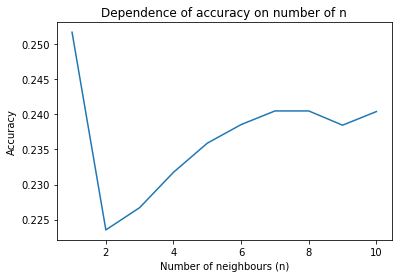

In [80]:
x = [i for i in range(1,11)]
g = plt.plot(x, my_accuracies)
g = plt.title("Dependence of accuracy on number of n")
g = plt.xlabel("Number of neighbours (n)")
g = plt.ylabel("Accuracy")

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

#### Косинусная метрика

In [90]:
my_clf = MyKNeighborsClassifier(n_neighbors=7, algorithm='kd_tree', metric = 'cosine')

In [91]:
cosine_accuracy  = Mean_accuracy(my_clf, X, target)

In [92]:
cosine_accuracy 

0.24049852462828872

In [93]:
cosine_accuracy - my_accuracies[6]

0.0

Использование косинусной метрики не повлияло на качество валидации

#### TfIdf векторизация

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
vectorizer = TfidfVectorizer(stop_words= "english", min_df=0.01)
X = vectorizer.fit_transform(data)

In [96]:
X = X.toarray()

In [97]:
X.shape

(11314, 1142)

In [98]:
my_clf = MyKNeighborsClassifier(n_neighbors=7, algorithm='kd_tree')

In [99]:
TfIdf_accuracy = Mean_accuracy(my_clf, X, target)

In [100]:
TfIdf_accuracy

0.12789444270562522

In [101]:
TfIdf_accuracy - my_accuracies[6]

-0.1126040819226635

TfIdf векторизация ухудшила качетво 

Лучше всего оказалась исходная модель, остановимся на ней.

In [117]:
my_clf = MyKNeighborsClassifier(n_neighbors=7, algorithm='kd_tree')

In [118]:
my_clf.fit(X, target)

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [141]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [142]:
data = newsgroups['data']
target = newsgroups['target']

In [143]:
X = vectorizer.transform(data)

In [144]:
X = X.toarray()

In [145]:
X.shape

(7532, 1142)

In [146]:
my_clf_pred = my_clf.predict(X)
final_accuracy = accuracy_score(target, my_clf_pred)

In [147]:
final_accuracy

0.21946362187997875

In [148]:
my_accuracies[6] - final_accuracy

0.021034902748309964

Видно, что точность предсказания на test отличается от кросс-валидаци, на 0.02. Такое отличие можно объяснить как 
случайностью, так и возможной ролью переобучения. Вероятно при кроссвалидации в тестовые выборки попадали близкие по 
классу тексты, так как дополнительного контроля на сбалансированность выборок не ставилось. 